In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("modelling_data.csv")

df.head()

,timestamp,activity_id,heart_rate,acc_hand_6g_x,acc_hand_6g_y,acc_hand_6g_z,gyro_hand_x,gyro_hand_y,gyro_hand_z,acc_chest_6g_x,...,gyro_chest_x,gyro_chest_y,gyro_chest_z,acc_ankle_6g_x,acc_ankle_6g_y,acc_ankle_6g_z,gyro_ankle_x,gyro_ankle_y,gyro_ankle_z,subject_id
0,5.89,0,NaN,-9.70702,-1.60337,1.32098,0.030436,-0.015329,0.048605,0.110468,...,0.092914,-0.061808,0.041628,9.57575,-0.122278,-2.44844,-0.013731,0.010364,0.010731,108
1,5.90,0,NaN,-9.78262,-1.60285,1.29085,-0.011127,-0.013590,0.047283,0.110642,...,0.077161,-0.020504,0.061780,9.56080,-0.076888,-2.43337,0.004436,-0.005926,-0.006704,108
2,5.91,0,NaN,-9.78237,-1.57265,1.29079,-0.030363,-0.027122,0.024034,0.050393,...,0.079766,-0.043622,0.068805,9.57594,-0.091972,-2.40313,0.022508,-0.002265,0.014646,108
3,5.92,0,NaN,-9.70677,-1.60334,1.35118,-0.008672,-0.025197,0.019366,0.035999,...,0.075553,-0.020911,0.044181,9.62108,-0.076819,-2.38829,-0.006964,0.035314,0.010982,108
4,5.93,0,NaN,-9.58657,-1.57408,1.27549,0.011593,-0.069777,-0.002699,-0.068852,...,0.088234,-0.020777,0.039643,9.62158,-0.091796,-2.26716,-0.015835,-0.001065,-0.000410,108


In [5]:
print(df['subject_id'].unique())

print(df['activity_id'].unique())

[108 109 107 106 104 105 101 102 103]
[ 0  1  2  3 17 16 12 13  4  6  7  5 24]


In [8]:
df = df[df['activity_id'] != 0]
df.reset_index(drop=True, inplace=True)
print("activity_id == 0 dropped.")

activity_id == 0 dropped.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   timestamp       float64
 1   activity_id     int64  
 2   heart_rate      float64
 3   acc_hand_6g_x   float64
 4   acc_hand_6g_y   float64
 5   acc_hand_6g_z   float64
 6   gyro_hand_x     float64
 7   gyro_hand_y     float64
 8   gyro_hand_z     float64
 9   acc_chest_6g_x  float64
 10  acc_chest_6g_y  float64
 11  acc_chest_6g_z  float64
 12  gyro_chest_x    float64
 13  gyro_chest_y    float64
 14  gyro_chest_z    float64
 15  acc_ankle_6g_x  float64
 16  acc_ankle_6g_y  float64
 17  acc_ankle_6g_z  float64
 18  gyro_ankle_x    float64
 19  gyro_ankle_y    float64
 20  gyro_ankle_z    float64
 21  subject_id      int64  
dtypes: float64(20), int64(2)
memory usage: 326.1 MB


In [12]:
df.describe()

,timestamp,activity_id,heart_rate,acc_hand_6g_x,acc_hand_6g_y,acc_hand_6g_z,gyro_hand_x,gyro_hand_y,gyro_hand_z,acc_chest_6g_x,...,gyro_chest_x,gyro_chest_y,gyro_chest_z,acc_ankle_6g_x,acc_ankle_6g_y,acc_ankle_6g_z,gyro_ankle_x,gyro_ankle_y,gyro_ankle_z,subject_id
count,1.942872e+06,1.942872e+06,177408.000000,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.940452e+06,...,1.940452e+06,1.940452e+06,1.940452e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,107.468502,-4.871064e+00,3.569088e+00,3.794033e+00,6.470148e-04,3.990067e-02,-2.219538e-03,1.991262e-01,...,5.585067e-03,1.174068e-02,-2.294136e-02,9.374634e+00,-4.766406e-02,-2.174022e+00,1.062149e-02,-3.676710e-02,7.725809e-03,1.045664e+02
std,1.093463e+03,6.174789e+00,26.977609,6.237104e+00,6.586273e+00,3.946330e+00,1.328472e+00,9.542155e-01,1.595544e+00,1.738491e+00,...,4.498724e-01,5.644908e-01,3.172985e-01,6.070061e+00,7.193848e+00,3.477607e+00,1.126987e+00,6.380790e-01,2.011906e+00,2.333052e+00
min,3.120000e+01,1.000000e+00,57.000000,-6.121470e+01,-6.184170e+01,-6.193470e+01,-2.813540e+01,-1.784950e+01,-1.426470e+01,-3.420400e+01,...,-1.252510e+01,-5.068580e+00,-4.404200e+00,-6.114200e+01,-6.190640e+01,-6.231480e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,1.010000e+02
25%,7.445400e+02,3.000000e+00,86.000000,-8.854415e+00,1.047087e+00,1.363960e+00,-3.768683e-01,-2.224115e-01,-3.798985e-01,-6.317430e-01,...,-1.095913e-01,-1.363623e-01,-1.311830e-01,8.396800e+00,-2.075910e+00,-3.398530e+00,-2.062960e-01,-1.063010e-01,-4.368720e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,104.000000,-5.353635e+00,3.562085e+00,3.672370e+00,-6.076310e-03,5.905485e-03,-5.582015e-03,3.089640e-01,...,2.696010e-03,6.821335e-04,-1.690045e-02,9.550660e+00,-2.252480e-01,-1.991280e+00,4.666780e-03,-3.971010e-03,-2.243400e-03,1.050000e+02
75%,2.663610e+03,1.300000e+01,124.000000,-8.922058e-01,6.458670e+00,6.787760e+00,3.323695e-01,2.655973e-01,3.648515e-01,9.734322e-01,...,1.121020e-01,1.654770e-01,8.403043e-02,1.027970e+01,1.921310e+00,-5.940280e-01,1.307210e-01,1.154390e-01,9.160350e-02,1.070000e+02
max,4.245680e+03,2.400000e+01,202.000000,5.282140e+01,6.225980e+01,6.192340e+01,2.641580e+01,2.307790e+01,1.433840e+01,2.573610e+01,...,1.851590e+01,6.015280e+00,3.052590e+00,6.196930e+01,6.204900e+01,6.093570e+01,1.742040e+01,1.358820e+01,1.652880e+01,1.090000e+02


In [14]:
print(df.isna().sum())

timestamp               0
activity_id             0
heart_rate        1765464
acc_hand_6g_x       11124
acc_hand_6g_y       11124
acc_hand_6g_z       11124
gyro_hand_x         11124
gyro_hand_y         11124
gyro_hand_z         11124
acc_chest_6g_x       2420
acc_chest_6g_y       2420
acc_chest_6g_z       2420
gyro_chest_x         2420
gyro_chest_y         2420
gyro_chest_z         2420
acc_ankle_6g_x       8507
acc_ankle_6g_y       8507
acc_ankle_6g_z       8507
gyro_ankle_x         8507
gyro_ankle_y         8507
gyro_ankle_z         8507
subject_id              0
dtype: int64


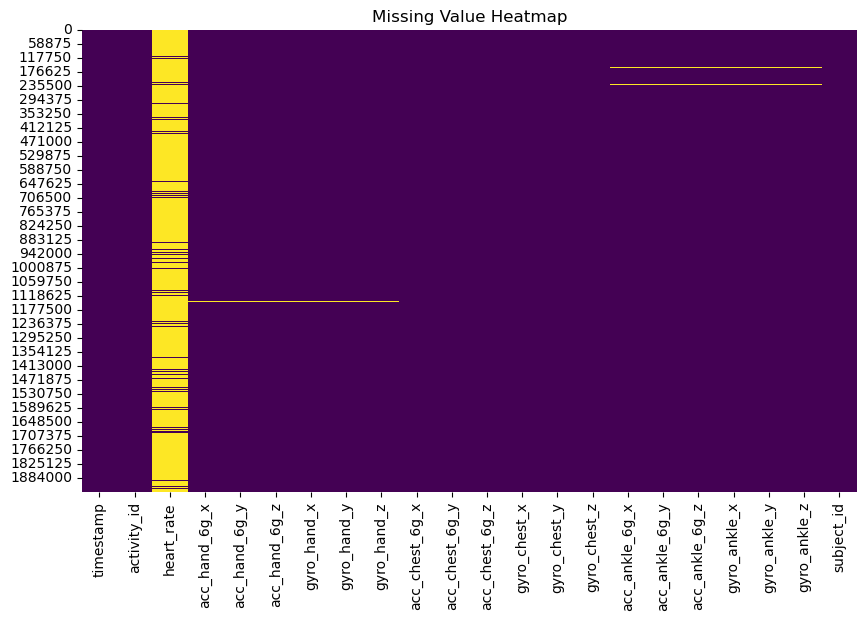

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Value Heatmap")
plt.show()

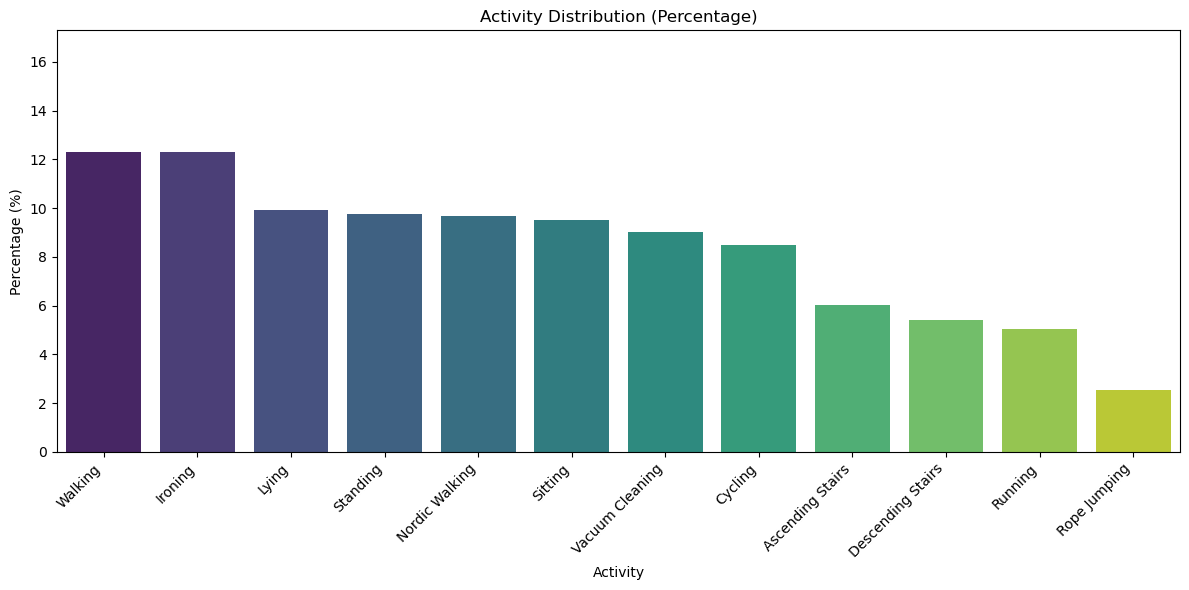

In [18]:
#activity distribution
#plt.figure(figsize=(8, 6))
#sns.countplot(x='activity_id', hue='activity_id', data=df, palette='viridis', legend=False)
#plt.title("Activity Distribution")
#plt.xlabel("Activity ID")
#plt.ylabel("Count")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

#activity labels
activity_labels = {1: 'Lying', 2: 'Sitting', 3: 'Standing', 4: 'Walking', 5: 'Running', 6: 'Cycling', 7: 'Nordic Walking', 
                   9: 'Watching TV', 10: 'Computer Work', 11: 'Car Driving', 12: 'Ascending Stairs', 13: 'Descending Stairs', 
                   16: 'Vacuum Cleaning', 17: 'Ironing', 18: 'Folding Laundry', 19: 'House Cleaning', 20: 'Playing Soccer', 
                   24: 'Rope Jumping'}

df['activity_label'] = df['activity_id'].map(activity_labels)


activity_percent = (df['activity_label'].value_counts(normalize=True)
    .mul(100).rename_axis('activity').reset_index(name='percentage'))

plt.figure(figsize=(12, 6))
sns.barplot(data=activity_percent, x='activity', y='percentage', palette='viridis', hue='activity')
plt.title("Activity Distribution (Percentage)")
plt.ylabel("Percentage (%)")
plt.xlabel("Activity")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, activity_percent['percentage'].max() + 5)  
plt.tight_layout()
plt.show()

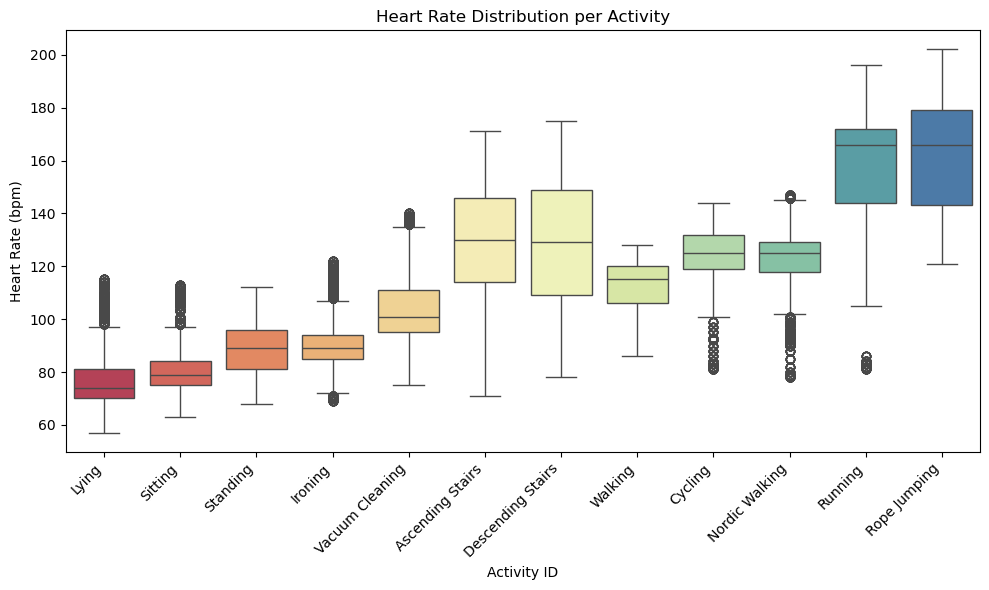

In [22]:
#Outlier Detection
plt.figure(figsize=(10, 6))
df['activity_label'] = df['activity_id'].map(activity_labels)
#sns.boxplot(x='activity_label', y='heart_rate', data=df)
sns.boxplot(x='activity_label', y='heart_rate', data=df, hue='activity_label', palette='Spectral')

plt.title("Heart Rate Distribution per Activity")
plt.xlabel("Activity ID")
plt.ylabel("Heart Rate (bpm)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

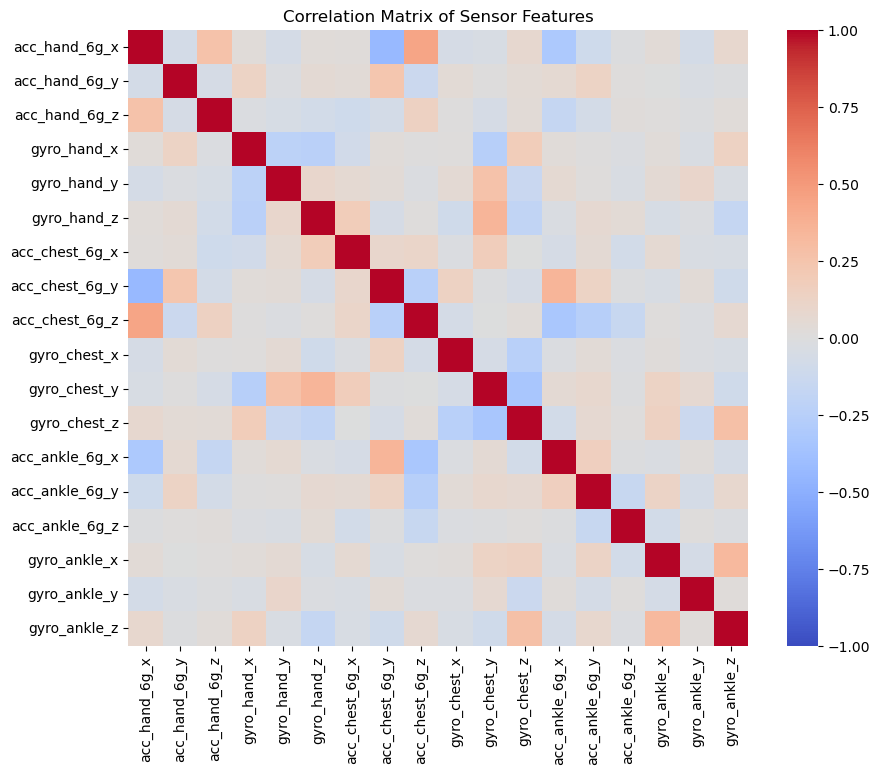

In [24]:
# Sensor Feature Correlation
sensor_features = df.filter(regex='acc_|gyro_')
plt.figure(figsize=(10, 8))
sns.heatmap(sensor_features.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Sensor Features")
plt.show()

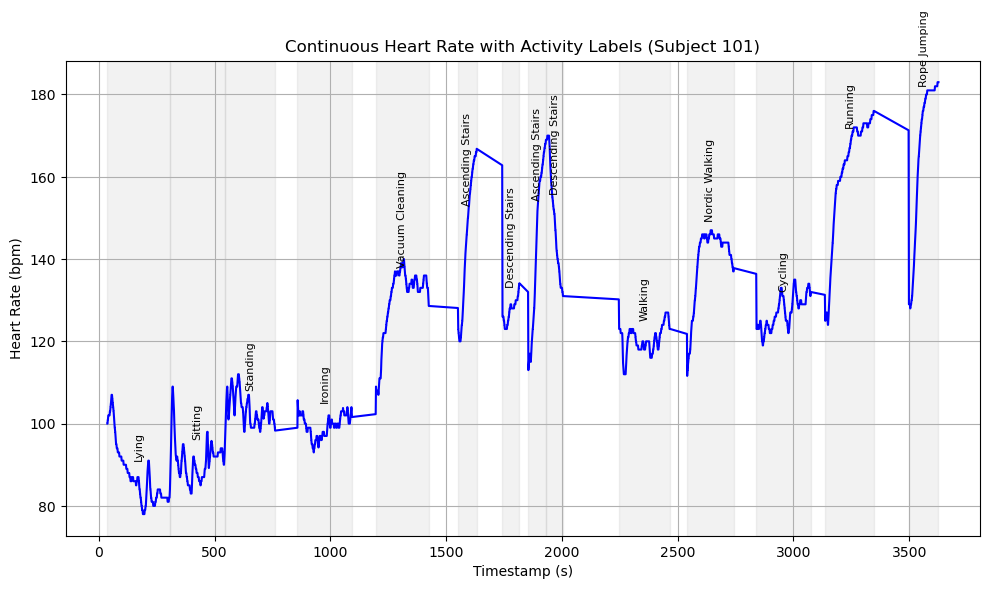

In [56]:
# Heart Rate Time Series for Subject 101
sample_subject = 101
sample_df = df[df['subject_id'] == sample_subject].copy()
sample_df = sample_df.sort_values(by='timestamp')

sample_df = sample_df[['timestamp', 'heart_rate', 'activity_id']].dropna()

sample_df['hr_smooth'] = sample_df['heart_rate'].rolling(window=10, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(sample_df['timestamp'], sample_df['hr_smooth'], color='blue', label='Heart Rate')

activity_segments = sample_df.groupby((sample_df['activity_id'] != sample_df['activity_id'].shift()).cumsum())

for _, group in activity_segments:
    act_id = group['activity_id'].iloc[0]
    act_label = activity_labels.get(act_id, f"Activity {act_id}")
    
    start_time = group['timestamp'].min()
    end_time = group['timestamp'].max()
    mid_time = (start_time + end_time) / 2
    mid_hr = group['hr_smooth'].median()

    # optional background color (faint)
    plt.axvspan(start_time, end_time, alpha=0.1, color='gray')

    # add label
    plt.text(mid_time, mid_hr + 5, act_label, ha='center', va='bottom', fontsize=8, rotation=90, color='black')

plt.title(f"Continuous Heart Rate with Activity Labels (Subject {sample_subject})")
plt.xlabel("Timestamp (s)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()



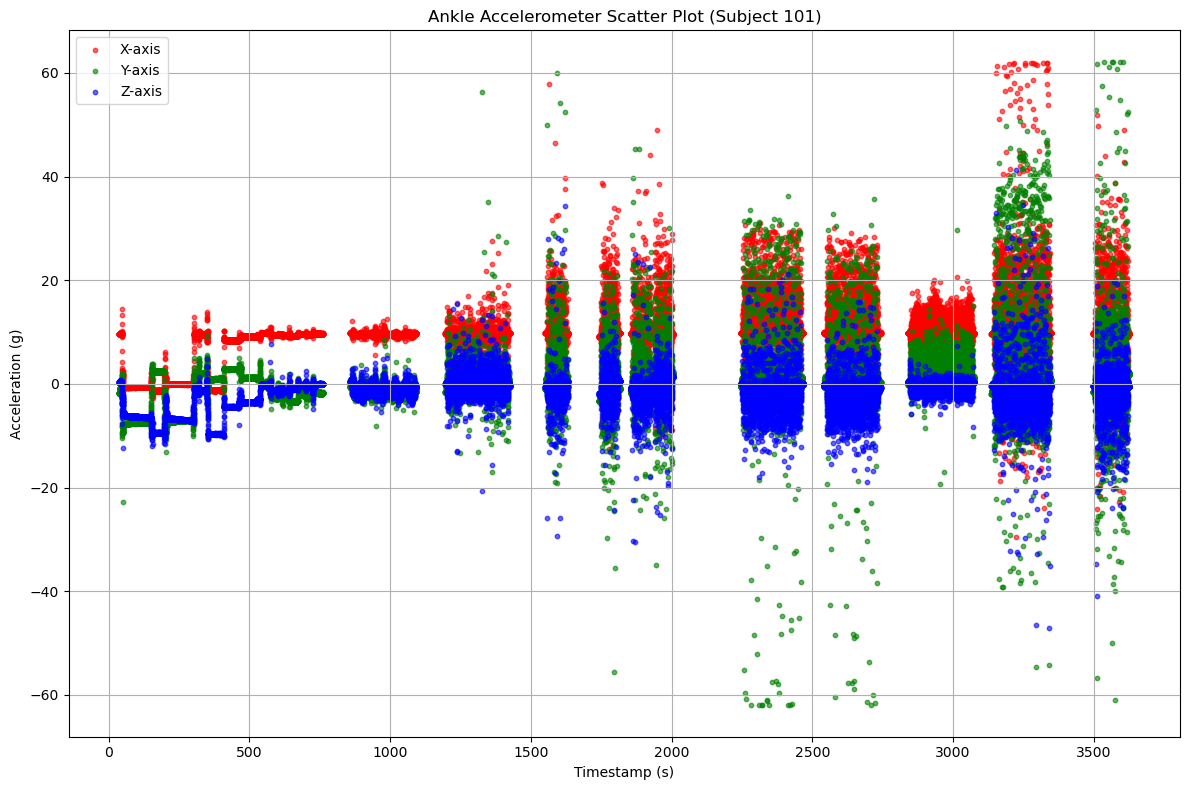

In [68]:
sample_subject = 101
sample_df = df[df['subject_id'] == sample_subject].copy()

sample_df_ds = sample_df.iloc[::10]

# Scatter plot for all 3 accelerometer axes
plt.figure(figsize=(12, 8))
plt.scatter(sample_df_ds['timestamp'], sample_df_ds['acc_ankle_6g_x'], color='red', label='X-axis', s=10, alpha=0.6)
plt.scatter(sample_df_ds['timestamp'], sample_df_ds['acc_ankle_6g_y'], color='green', label='Y-axis', s=10, alpha=0.6)
plt.scatter(sample_df_ds['timestamp'], sample_df_ds['acc_ankle_6g_z'], color='blue', label='Z-axis', s=10, alpha=0.6)

plt.title("Ankle Accelerometer Scatter Plot (Subject 101)")
plt.xlabel("Timestamp (s)")
plt.ylabel("Acceleration (g)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

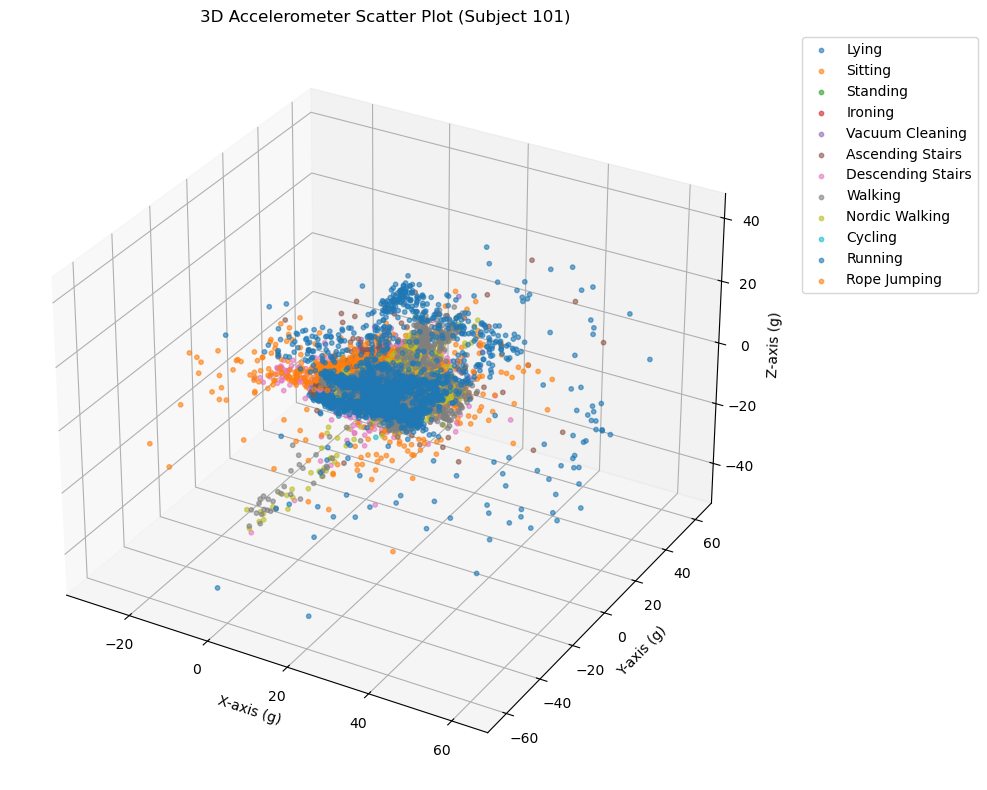

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Activity label mapping
activity_labels = {1: 'Lying', 2: 'Sitting', 3: 'Standing', 4: 'Walking', 5: 'Running', 6: 'Cycling', 7: 'Nordic Walking', 
                   9: 'Watching TV', 10: 'Computer Work', 11: 'Car Driving', 12: 'Ascending Stairs', 13: 'Descending Stairs',
                   16: 'Vacuum Cleaning', 17: 'Ironing', 18: 'Folding Laundry', 19: 'House Cleaning', 20: 'Playing Soccer', 
                   24: 'Rope Jumping'}
#
sample_subject = 101
sample_df = df[df['subject_id'] == sample_subject].copy()
sample_df['activity_label'] = sample_df['activity_id'].map(activity_labels)

# Downsampling
sample_df_ds = sample_df.iloc[::10]

#3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use seaborn palette to assign a color per activity
unique_activities = sample_df_ds['activity_label'].dropna().unique()
palette = sns.color_palette("tab10", n_colors=len(unique_activities))
color_map = dict(zip(unique_activities, palette))

# Plot each activity in different color
for activity in unique_activities:
    data = sample_df_ds[sample_df_ds['activity_label'] == activity]
    ax.scatter(data['acc_ankle_6g_x'], data['acc_ankle_6g_y'], data['acc_ankle_6g_z'],
        color=color_map[activity], label=activity, alpha=0.6, s=10)


ax.set_xlabel('X-axis (g)')
ax.set_ylabel('Y-axis (g)')
ax.set_zlabel('Z-axis (g)')
ax.set_title(f"3D Accelerometer Scatter Plot (Subject {sample_subject})")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

Data Modelling: 
1. Random Forest
2. Support Vector Machine
3. KNN
4. XGBoost

In [127]:
print(y.value_counts())

activity_id
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: count, dtype: int64


In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df.dropna(subset=['activity_id'], inplace=True)

# Define features and target
X = df.drop(columns=['activity_id', 'timestamp', 'subject_id', 'activity_label'])
y = df['activity_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline for missing values and scaled features to normalize sensor readings.
preprocess = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
Random Forest - Best Parameters: {'max_depth': 20, 'n_estimators': 300}
Classification Report:               precision    recall  f1-score   support

           1       1.00      0.93      0.96     38505
           2       0.95      0.88      0.91     37038
           3       0.78      0.90      0.84     37986
           4       0.73      0.90      0.81     47752
           5       0.93      0.89      0.91     19640
           6       0.87      0.89      0.88     32920
           7       0.78      0.84      0.81     37621
          12       0.79      0.56      0.66     23443
          13       0.80      0.48      0.60     20989
          16       0.81      0.65      0.72     35071
          17       0.73      0.90      0.80     47738
          24       0.93      0.57      0.71      9872

    accuracy                           0.82    388575
   macro avg       0.84      0.78      0.80    388575
weighted avg       0.83      0.8

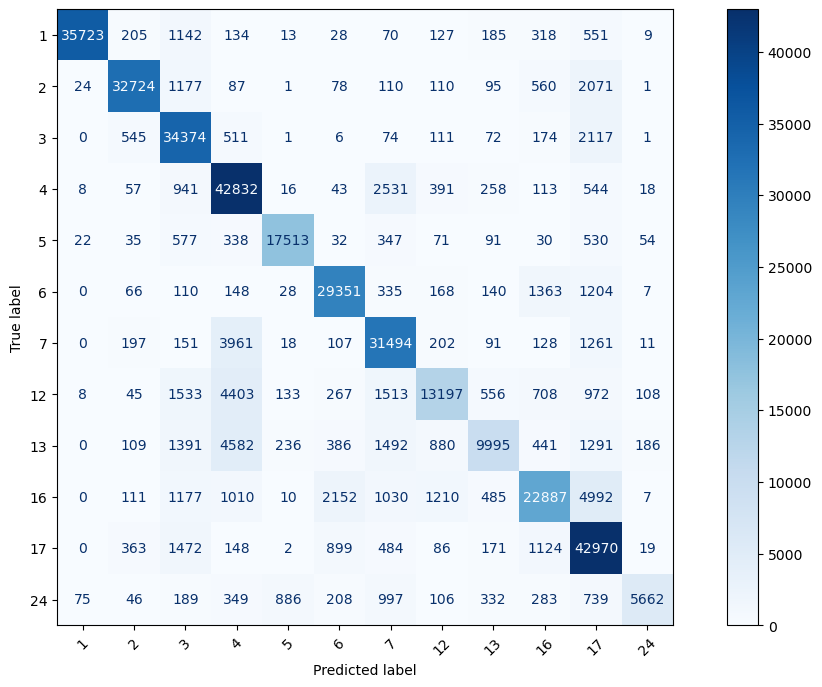

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# sampling with reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_sample = X_train.iloc[:5000]
y_train_sample = y_train.iloc[:5000]

#
X_train_sample_processed = preprocess.fit_transform(X_train_sample)

# Apply SMOTE
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_sample_balanced, y_train_sample_balanced = smote.fit_resample(X_train_sample_processed, y_train_sample)


# Modelling
rf = RandomForestClassifier(class_weight='balanced')
rf_param_grid = {'n_estimators': [50, 100, 150,200,300], 'max_depth': [5, 10, 15,20, None]}

# GridSearch 
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, cv=2, scoring='f1_weighted', verbose=1, n_jobs=-1)
rf_grid.fit(X_train_sample_processed, y_train_sample)

# Predict on full test set
y_pred_rf = rf_grid.best_estimator_.predict(X_test_processed)


print("Random Forest - Best Parameters:", rf_grid.best_params_)
print("Classification Report:", classification_report(y_test, y_pred_rf))

fig, ax = plt.subplots(figsize=(14,8))
ConfusionMatrixDisplay.from_estimator(rf_grid.best_estimator_, X_test_processed, y_test, cmap="Blues", xticks_rotation=45, ax=ax)
plt.show()

Fitting 2 folds for each of 4 candidates, totalling 8 fits
SVM - Best Parameters: {'C': 10}
SVM Classification Report:               precision    recall  f1-score   support

           1       0.83      0.93      0.88     38505
           2       0.51      0.35      0.42     37038
           3       0.18      0.05      0.08     37986
           4       0.33      0.79      0.46     47752
           5       0.39      0.02      0.05     19640
           6       0.57      0.85      0.69     32920
           7       0.44      0.23      0.30     37621
          12       0.44      0.17      0.25     23443
          13       0.41      0.20      0.27     20989
          16       0.40      0.43      0.42     35071
          17       0.43      0.61      0.50     47738
          24       0.38      0.03      0.05      9872

    accuracy                           0.46    388575
   macro avg       0.44      0.39      0.36    388575
weighted avg       0.45      0.46      0.41    388575



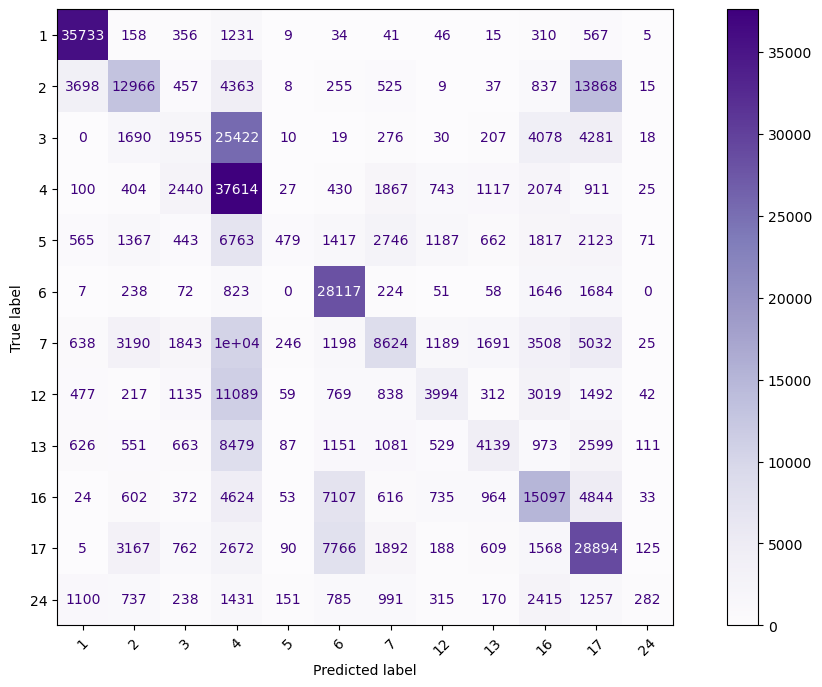

In [121]:
#SVM
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=3000)

svm_param_grid = {'C': [0.1, 1, 10]}

svm_grid = GridSearchCV(svm, param_grid=svm_param_grid, cv=2, scoring='f1_weighted', verbose=1, n_jobs=-1)
svm_grid.fit(X_train_sample_processed, y_train_sample)

y_pred_svm = svm_grid.best_estimator_.predict(X_test_processed)

print("SVM - Best Parameters:", svm_grid.best_params_)
print("SVM Classification Report:", classification_report(y_test, y_pred_svm))

fig, ax = plt.subplots(figsize=(14,8))
ConfusionMatrixDisplay.from_estimator(svm_grid.best_estimator_, X_test_processed, y_test, cmap="Purples", xticks_rotation=45, ax=ax)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
KNN - Best Parameters: {'n_neighbors': 3}
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.90      0.94      0.92     38505
           2       0.73      0.91      0.81     37038
           3       0.64      0.88      0.74     37986
           4       0.67      0.87      0.76     47752
           5       0.89      0.84      0.86     19640
           6       0.80      0.88      0.84     32920
           7       0.79      0.73      0.76     37621
          12       0.67      0.49      0.57     23443
          13       0.72      0.32      0.44     20989
          16       0.85      0.49      0.62     35071
          17       0.73      0.73      0.73     47738
          24       0.90      0.46      0.61      9872

    accuracy                           0.75    388575
   macro avg       0.77      0.71      0.72    388575
weighted avg       0.76      0.75      0.74    388575



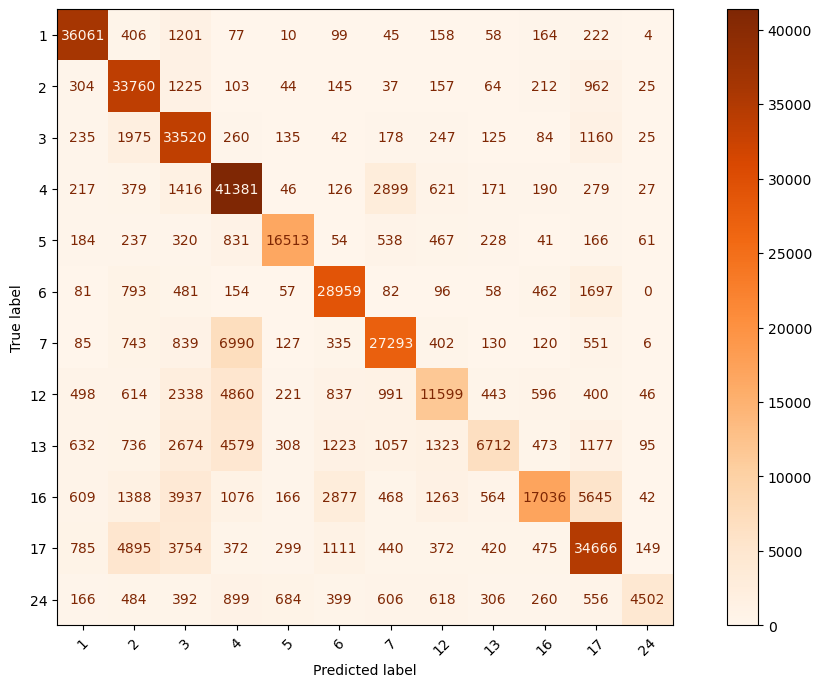

In [101]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors': [3, 5, 7]}

knn_grid = GridSearchCV(knn, param_grid=knn_param_grid, cv=2, scoring='f1_weighted', verbose=1, n_jobs=-1)
knn_grid.fit(X_train_sample_processed, y_train_sample)

y_pred_knn = knn_grid.best_estimator_.predict(X_test_processed)

print("KNN - Best Parameters:", knn_grid.best_params_)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

fig, ax = plt.subplots(figsize=(14,8))
ConfusionMatrixDisplay.from_estimator(knn_grid.best_estimator_, X_test_processed, y_test, cmap="Oranges", xticks_rotation=45, ax=ax)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
XGBoost - Best Parameters: {'max_depth': 6, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.93      0.96     38505
           2       0.95      0.89      0.92     37038
           3       0.80      0.89      0.84     37986
           4       0.79      0.88      0.84     47752
           5       0.90      0.86      0.88     19640
           6       0.90      0.90      0.90     32920
           7       0.81      0.83      0.82     37621
          12       0.69      0.64      0.66     23443
          13       0.72      0.52      0.61     20989
          16       0.78      0.71      0.74     35071
          17       0.77      0.89      0.82     47738
          24       0.82      0.57      0.67      9872

    accuracy                           0.83    388575
   macro avg       0.83      0.79      0.80    388575
weighted avg       0.83      0.83      0

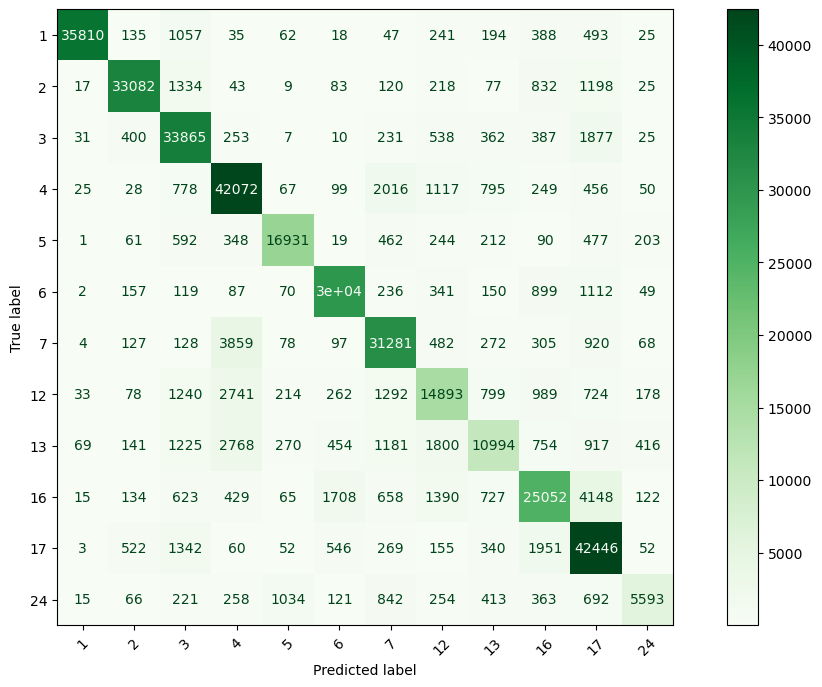

In [111]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
#xgboost
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode activity labels to 0-based range
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Stratified sampling (on encoded labels)
strat_sample = StratifiedShuffleSplit(n_splits=1, test_size=(len(X_train) - 5000), random_state=42)
for train_index, _ in strat_sample.split(X_train, y_train):
    X_train_sample = X_train.iloc[train_index]
    y_train_sample = y_train.iloc[train_index]

# Encode sampled labels
y_train_sample_encoded = label_encoder.transform(y_train_sample)
y_test_encoded = label_encoder.transform(y_test)

# Preprocessing pipeline
preprocess = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

X_train_sample_processed = preprocess.fit_transform(X_train_sample)
X_test_processed = preprocess.transform(X_test)

# XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0)

xgb_param_grid = {'n_estimators': [50, 100],'max_depth': [3, 6]}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=2, scoring='f1_weighted', verbose=1, n_jobs=-1)
xgb_grid.fit(X_train_sample_processed, y_train_sample_encoded)

# Predict and inverse transform labels to original
y_pred_xgb_encoded = xgb_grid.best_estimator_.predict(X_test_processed)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluation
print("XGBoost - Best Parameters:", xgb_grid.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

fig, ax = plt.subplots(figsize=(14,8))
ConfusionMatrixDisplay.from_estimator(xgb_grid.best_estimator_, X_test_processed, y_test_encoded,
                                      display_labels=label_encoder.classes_, cmap="Greens", xticks_rotation=45, ax=ax)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Logistic Regression - Best Parameters: {'C': 10, 'solver': 'saga'}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94     38505
           2       0.55      0.56      0.56     37038
           3       0.42      0.47      0.44     37986
           4       0.42      0.62      0.50     47752
           5       0.32      0.14      0.20     19640
           6       0.71      0.78      0.75     32920
           7       0.43      0.35      0.39     37621
          12       0.44      0.27      0.33     23443
          13       0.44      0.22      0.29     20989
          16       0.44      0.49      0.46     35071
          17       0.52      0.65      0.58     47738
          24       0.41      0.11      0.17      9872

    accuracy                           0.53    388575
   macro avg       0.50      0.46      0.47    388575
weighted avg     

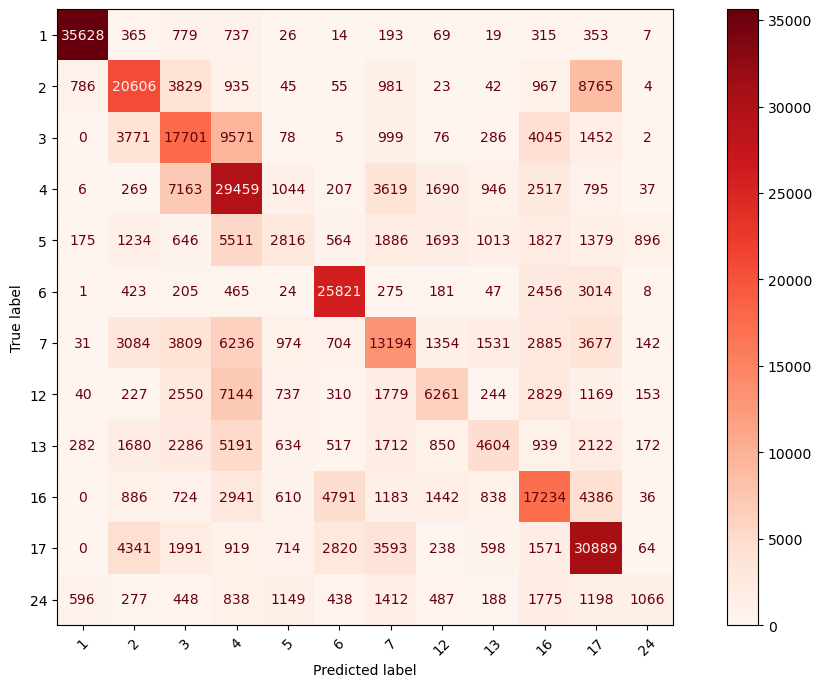

In [113]:
#log reg
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, n_jobs=-1)

lr_param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'saga']}

lr_grid = GridSearchCV(lr, param_grid=lr_param_grid, cv=2, scoring='f1_weighted', verbose=1, n_jobs=-1)
lr_grid.fit(X_train_sample_processed, y_train_sample)

y_pred_lr = lr_grid.best_estimator_.predict(X_test_processed)

print("Logistic Regression - Best Parameters:", lr_grid.best_params_)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

fig, ax = plt.subplots(figsize=(14,8))
ConfusionMatrixDisplay.from_estimator(lr_grid.best_estimator_, X_test_processed, y_test, cmap="Reds", xticks_rotation=45, ax=ax)

Model Performance Comparison:
                     Accuracy  F1-Score (weighted)  Precision (weighted)  \
Random Forest        0.814494             0.808887              0.821799   
SVM                  0.457845             0.410933              0.448548   
KNN                  0.751469             0.740733              0.761943   
XGBoost              0.827941             0.825656              0.829183   
Logistic Regression  0.528287             0.514039              0.521988   

                     Recall (weighted)  
Random Forest                 0.814494  
SVM                           0.457845  
KNN                           0.751469  
XGBoost                       0.827941  
Logistic Regression           0.528287  


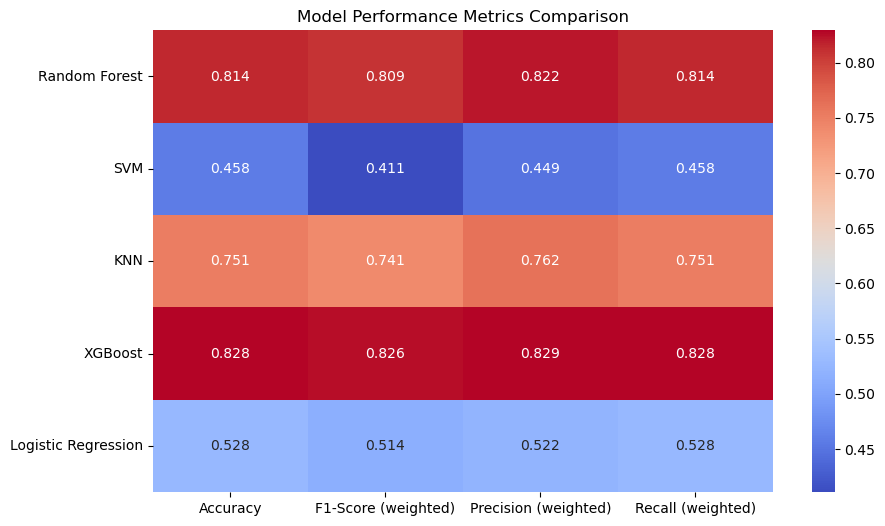

In [115]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming these variables contain predicted labels from each model
# y_pred_rf, y_pred_svm, y_pred_knn, y_pred_xgb, y_pred_logreg
# And y_test is the true labels

models_preds = {'Random Forest': y_pred_rf, 'SVM': y_pred_svm, 'KNN': y_pred_knn, 'XGBoost': y_pred_xgb,
                'Logistic Regression': y_pred_lr}

results = {}

for name, y_pred in models_preds.items():
    results[name] = {'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score (weighted)': f1_score(y_test, y_pred, average='weighted'),
        'Precision (weighted)': precision_score(y_test, y_pred, average='weighted'),
        'Recall (weighted)': recall_score(y_test, y_pred, average='weighted'),
                    }

results_df = pd.DataFrame(results).T

print("Model Performance Comparison:")
print(results_df)

# Optional: heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Model Performance Metrics Comparison")
plt.show()

Stress detection modelling
Detect cardiovascular stress based on heart rate and activity intensity.


In [130]:
# creating stress level target variables normal vs abnormal
# using heart rate + activity features as i/p
# training classifier both Random forest & log reg (cardiovascular stress detection classifiers)
# evaluating confusion matrix with Roc curve